# Segmenting and Clustering Neighborhoods in Toronto

## Part I: Preparing Data

In [74]:
! python -m pip install geocoder


In [75]:
! pip install folium

In [76]:
import pandas as pd
import numpy as np
import requests
from geopy.geocoders import Nominatim
import json
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [77]:
toronto_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

Extract only the data of the first table of wikipedia website  

In [78]:
toronto_df = toronto_df[0]

In [79]:
toronto_df

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


Removing rows which have Borough as "Not Assigned"

In [80]:
toronto_df.drop(toronto_df.loc[toronto_df['Borough']=='Not assigned'].index,axis = 0, inplace = True)

In [81]:
toronto_df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


Combine rows with similar postal code

In [82]:
toronto_df_grp=toronto_df.groupby(['Postcode']).agg({'Borough':'first','Neighbourhood': lambda a: ", ".join(a)}).reset_index()

In [83]:
toronto_df_grp

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


Replace the Not Assigned for M7A to the Borough name Queen's Park

In [84]:
toronto_df_grp['Neighbourhood'].replace('Not assigned', "Queen's Park", inplace = True)
toronto_df_grp

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [85]:
toronto_df_grp.shape

(103, 3)

## Part II

Installed geocoder but it was not working so used geopy Nominatim instead

Create Empty Latitude & Longitude Columns 

In [86]:
toronto_df_grp['Latitude'] = ''
toronto_df_grp['Longitude'] = ''
toronto_df_grp.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",,
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",,
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",,
3,M1G,Scarborough,Woburn,,
4,M1H,Scarborough,Cedarbrae,,


In [87]:
for i in range(len(toronto_df_grp)):
    geolocator = Nominatim(user_agent="toronto_exp", format_string="%s, Toronto Canada" )
    postal = toronto_df_grp.loc[i,'Postcode']
    location = geolocator.geocode(postal) 
    if location is None:
        continue
    toronto_df_grp.loc[i,'Latitude'] = location.latitude
    toronto_df_grp.loc[i,'Longitude'] = location.longitude
   

In [88]:
toronto_df_grp

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.654,-79.3872
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.654,-79.3872
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",,
3,M1G,Scarborough,Woburn,43.7608,-79.2237
4,M1H,Scarborough,Cedarbrae,,
5,M1J,Scarborough,Scarborough Village,,
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",,
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",,
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",,
9,M1N,Scarborough,"Birch Cliff, Cliffside West",,


Missing a lot of the Latitudes and Longitudes so will use the csv file to obtain post codes instead

In [89]:
missing_post = pd.read_csv('https://cocl.us/Geospatial_data')

In [90]:
missing_post.head(10)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [91]:
missing_post.rename(columns = {'Postal Code': 'Postal_Code'},inplace = True)
missing_post.head()

,Postal_Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [92]:
toronto_df_grp.loc[toronto_df_grp.Postcode.isin(missing_post.Postal_Code),['Latitude','Longitude']] = missing_post[['Latitude','Longitude']]

In [93]:
toronto_df_grp

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.8067,-79.1944
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.7845,-79.1605
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7636,-79.1887
3,M1G,Scarborough,Woburn,43.771,-79.2169
4,M1H,Scarborough,Cedarbrae,43.7731,-79.2395
5,M1J,Scarborough,Scarborough Village,43.7447,-79.2395
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.7279,-79.262
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.7111,-79.2846
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.7163,-79.2395
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.6927,-79.2648


# Part III

#### Compare Boroughs Based on how many Post Codes they have

Determine how many times each Borough is listed

In [94]:
Borough_count = toronto_df_grp['Borough'].value_counts().to_frame(name='count')
print(Borough_count)
print()
print( 'Average # of Post Codes per Borought: ')
Borough_count['count'].mean()

                  count
North York           24
Downtown Toronto     18
Scarborough          17
Etobicoke            12
Central Toronto       9
West Toronto          6
East York             5
York                  5
East Toronto          5
Mississauga           1
Queen's Park          1

Average # of Post Codes per Borought: 


9.363636363636363

Determined that on Average there are 9 Post Codes per Borough.   

Analyze Boroughs that are below this average first. 

In [95]:
mask = Borough_count['count'] <= 9
below_avg = Borough_count[mask]
below_avg

,count
Central Toronto,9
West Toronto,6
East York,5
York,5
East Toronto,5
Mississauga,1
Queen's Park,1


In [96]:
new_toronto = (toronto_df_grp[toronto_df_grp['Borough'].isin(below_avg.index)]).reset_index()
new_toronto.drop('index', axis = 1)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4B,East York,"Woodbine Gardens, Parkview Hill",43.7064,-79.3099
1,M4C,East York,Woodbine Heights,43.6953,-79.3184
2,M4E,East Toronto,The Beaches,43.6764,-79.293
3,M4G,East York,Leaside,43.7091,-79.3635
4,M4H,East York,Thorncliffe Park,43.7054,-79.3494
5,M4J,East York,East Toronto,43.6853,-79.3381
6,M4K,East Toronto,"The Danforth West, Riverdale",43.6796,-79.3522
7,M4L,East Toronto,"The Beaches West, India Bazaar",43.669,-79.3156
8,M4M,East Toronto,Studio District,43.6595,-79.3409
9,M4N,Central Toronto,Lawrence Park,43.728,-79.3888


Get longitude and Latitude for Toronto

In [97]:
toronto_ll= geolocator.geocode('Toronto, Canada')
toronto_lat = toronto_ll.latitude
toronto_lng = toronto_ll.longitude
print('Latitude: {}, Longitude: {}.'.format(toronto_lat, toronto_lng))

Latitude: 43.8210462, Longitude: -79.3286519.


Create map of all boroughs in toronto

In [98]:
map_toronto = folium.Map(location = [toronto_lat, toronto_lng], width = '75%', height = '75%', zoom_start = 10)
for lat, lng, borough, neighborhood in zip(toronto_df_grp['Latitude'], toronto_df_grp['Longitude'],  toronto_df_grp['Borough'], toronto_df_grp['Neighbourhood']):
    label = '{}: {}'.format(borough,neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat,lng], 
                         radius = 5, 
                         popup = label,
                        color = 'Blue',
                        fill = True,
                        fill_color = 'Red',
                        fill_opacity = 0.7,
                        parse_html = False).add_to(map_toronto)
map_toronto

Create Map of the Boroughs with lower than average post codes

In [99]:
map_toronto_postcodes = folium.Map(location = [toronto_lat, toronto_lng], width = '75%', height = '75%', zoom_start = 10)
for lat, lng, borough, neighborhood in zip(new_toronto['Latitude'], new_toronto['Longitude'],  new_toronto['Borough'], new_toronto['Neighbourhood']):
    label = '{}: {}'.format(borough,neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat,lng], 
                         radius = 5, 
                         popup = label,
                        color = 'Red',
                        fill = True,
                        fill_color = 'Red',
                        fill_opacity = 0.7,
                        parse_html = False).add_to(map_toronto_postcodes)
map_toronto_postcodes

Appears that the Boroughs with below average postal codes are concentrated together. Lets compare it with those which are above average

In [100]:
above_avg = Borough_count[~mask]
above_avg

,count
North York,24
Downtown Toronto,18
Scarborough,17
Etobicoke,12


In [101]:
new_toronto_b = (toronto_df_grp[toronto_df_grp['Borough'].isin(above_avg.index)]).reset_index()
new_toronto_b.drop('index', axis = 1)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.8067,-79.1944
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.7845,-79.1605
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7636,-79.1887
3,M1G,Scarborough,Woburn,43.771,-79.2169
4,M1H,Scarborough,Cedarbrae,43.7731,-79.2395
5,M1J,Scarborough,Scarborough Village,43.7447,-79.2395
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.7279,-79.262
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.7111,-79.2846
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.7163,-79.2395
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.6927,-79.2648


In [102]:
map_toronto_above = folium.Map(location = [toronto_lat, toronto_lng], width = '75%', height = '75%', zoom_start = 10)
for lat, lng, borough, neighborhood in zip(new_toronto_b['Latitude'], new_toronto_b['Longitude'],  new_toronto_b['Borough'], new_toronto_b['Neighbourhood']):
    label = '{}: {}'.format(borough,neighborhood)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat,lng], 
                         radius = 5, 
                         popup = label,
                        color = 'Green',
                        fill = True,
                        fill_color = 'Green',
                        fill_opacity = 0.7,
                        parse_html = False).add_to(map_toronto_postcodes)
map_toronto_postcodes

Appears that those Boroughs with above average Post Codes are spread out more then that of the below average boroughs. 

This supports the idea that those Boroughs with a higher amount of Post Codes cover a larger land mass, hence why they need more postal codes

## Explore & Cluster

Will Explore similar venues for Boroughs with below average postal codes and compare that the similar venues of Boroughs to determine if there is any differences 

**Defining Function to find venuues for each Borough within a 500 m radius**

In [103]:
Client_ID = 'TMKYYC5FVQDEH5NOAX2JM3W4V0QVSHTIVRRY4H35DBK4RCHY'
Client_Secret = 'PGFWON4BYIFEOYE3RU3LUN0P5MJLYUYZUWNT3LUYEYYQ2QJY'
Version = '20180605'
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            Client_ID, 
            Client_Secret, 
            Version, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [104]:

toronto_venues_below = getNearbyVenues(names=new_toronto['Borough'],
                                   latitudes=new_toronto['Latitude'],
                                   longitudes=new_toronto['Longitude']
                                  )

East York
East York
East Toronto
East York
East York
East York
East Toronto
East Toronto
East Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
Central Toronto
York
York
West Toronto
West Toronto
West Toronto
York
York
West Toronto
West Toronto
West Toronto
Queen's Park
Mississauga
East Toronto
York


In [105]:
print(toronto_venues_below.shape)
toronto_venues_below.head(20)

(555, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East York,43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,East York,43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
2,East York,43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
3,East York,43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
4,East York,43.706397,-79.309937,Pizza Pizza,43.705159,-79.313130,Pizza Place
5,East York,43.706397,-79.309937,Harvey's,43.710730,-79.308838,Fast Food Restaurant
6,East York,43.706397,-79.309937,Nostalgia,43.706833,-79.311783,Café
7,East York,43.706397,-79.309937,St. Clair Ave E & O'Connor Dr,43.705233,-79.313274,Intersection
8,East York,43.706397,-79.309937,Venice Pizza,43.705921,-79.313957,Pizza Place
9,East York,43.706397,-79.309937,Harvey's,43.708136,-79.314105,Fast Food Restaurant


In [106]:
toronto_venues_below.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Central Toronto,114,114,114,114,114,114
East Toronto,124,124,124,124,124,124
East York,75,75,75,75,75,75
Mississauga,11,11,11,11,11,11
Queen's Park,39,39,39,39,39,39
West Toronto,172,172,172,172,172,172
York,20,20,20,20,20,20


**Repeat for Boroughs above the Postal Code Average**

In [108]:
toronto_venues_above = getNearbyVenues(names=new_toronto_b['Borough'],
                                   latitudes=new_toronto_b['Latitude'],
                                   longitudes=new_toronto_b['Longitude']
                                      )

Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
Scarborough
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
North York
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
Downtown Toronto
North York
North York
Downtown Toronto
North York
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
Etobicoke
North York
North York
Etobicoke
Etobicoke
Etobicoke
Etobicoke


In [109]:
print(toronto_venues_above.shape)
toronto_venues_above.head(20)

(1693, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,Scarborough,43.784535,-79.160497,RIGHT WAY TO GOLF,43.785177,-79.161108,Golf Course
2,Scarborough,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Scarborough,43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,Scarborough,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
5,Scarborough,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
6,Scarborough,43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
7,Scarborough,43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
8,Scarborough,43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
9,Scarborough,43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot


In [110]:
toronto_venues_above.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Downtown Toronto,1295,1295,1295,1295,1295,1295
Etobicoke,73,73,73,73,73,73
North York,239,239,239,239,239,239
Scarborough,86,86,86,86,86,86


In [113]:
print('Number of unique Venue Categories for Below Average Boroughs: ' + str(len(toronto_venues_below['Venue Category'].unique())))
print()
print('Number of unique Venue Categories for Above Average Boroughs: ' + str(len(toronto_venues_above['Venue Category'].unique())))

Number of unique Venue Categories for Below Average Boroughs: 156

Number of unique Venue Categories for Above Average Boroughs: 241


In [114]:
toronto_onehot = pd.get_dummies(toronto_venues_below[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Borough'] = toronto_venues_below['Borough'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head(11)

,Borough,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,East York,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
toronto_onehot.shape

(555, 157)

In [116]:
toronto_ven_grp = toronto_onehot.groupby('Borough').mean().reset_index()
toronto_ven_grp

,Borough,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,...,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Central Toronto,0.017544,0.000000,0.000000,0.000000,0.008772,0.000000,0.000000,0.008772,0.008772,...,0.008772,0.008772,0.008772,0.000000,0.008772,0.000000,0.000000,0.000000,0.00,0.008772
1,East Toronto,0.024194,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.000000,...,0.000000,0.016129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.024194
2,East York,0.000000,0.000000,0.000000,0.000000,0.000000,0.026667,0.000000,0.000000,0.013333,...,0.000000,0.000000,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.00,0.013333
3,Mississauga,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,Queen's Park,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.00,0.025641
5,West Toronto,0.000000,0.005814,0.005814,0.005814,0.017442,0.000000,0.000000,0.000000,0.005814,...,0.000000,0.000000,0.005814,0.000000,0.011628,0.000000,0.005814,0.000000,0.00,0.005814
6,York,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000


In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = toronto_ven_grp['Borough']

for ind in np.arange(toronto_ven_grp.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_ven_grp.iloc[ind, :], num_top_venues)

boroughs_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,Coffee Shop,Sandwich Place,Café,Pizza Place,Park,Restaurant,Dessert Shop,Sushi Restaurant,Pub,Italian Restaurant
1,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
2,East York,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
3,Mississauga,Hotel,Coffee Shop,American Restaurant,Burrito Place,Fried Chicken Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Sandwich Place,Gym / Fitness Center,Bagel Shop
4,Queen's Park,Coffee Shop,Park,Gym,Diner,Yoga Studio,Café,Spa,Japanese Restaurant,Burger Joint,Burrito Place
5,West Toronto,Bar,Café,Coffee Shop,Italian Restaurant,Bakery,Restaurant,Breakfast Spot,Pizza Place,Asian Restaurant,French Restaurant
6,York,Fast Food Restaurant,Convenience Store,Pizza Place,Park,Caribbean Restaurant,Brewery,Women's Store,Hockey Arena,Bus Line,Trail


**Quick Analysis**: Just on the data we have now I can see that Coffee Shops are very Common within these Boroughs.  It will be interesting to see how they are grouped together

### Clustering

In [119]:
elbow = []
toronto_clusters_b= toronto_ven_grp.drop('Borough',1)
for k in range(1,len(toronto_ven_grp)):
    km = KMeans(n_clusters = k, random_state = 0).fit(toronto_clusters_b)
    elbow.append(km.inertia_)


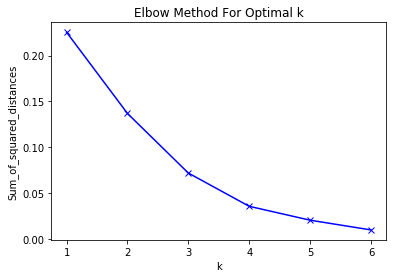

In [120]:
K = range(1,len(toronto_ven_grp))
plt.plot(K,  elbow, 'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [121]:
boroughs_venues_sorted.insert(0,'Cluster Labels',km.labels_)


In [122]:
boroughs_venues_sorted

,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,Central Toronto,Coffee Shop,Sandwich Place,Café,Pizza Place,Park,Restaurant,Dessert Shop,Sushi Restaurant,Pub,Italian Restaurant
1,5,East Toronto,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
2,3,East York,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
3,2,Mississauga,Hotel,Coffee Shop,American Restaurant,Burrito Place,Fried Chicken Joint,Mediterranean Restaurant,Middle Eastern Restaurant,Sandwich Place,Gym / Fitness Center,Bagel Shop
4,0,Queen's Park,Coffee Shop,Park,Gym,Diner,Yoga Studio,Café,Spa,Japanese Restaurant,Burger Joint,Burrito Place
5,1,West Toronto,Bar,Café,Coffee Shop,Italian Restaurant,Bakery,Restaurant,Breakfast Spot,Pizza Place,Asian Restaurant,French Restaurant
6,4,York,Fast Food Restaurant,Convenience Store,Pizza Place,Park,Caribbean Restaurant,Brewery,Women's Store,Hockey Arena,Bus Line,Trail


In [123]:
toronto_final_b = new_toronto
toronto_final_b = toronto_final_b.join(boroughs_venues_sorted.set_index('Borough'), on = 'Borough')
toronto_final_b

,index,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,35,M4B,East York,"Woodbine Gardens, Parkview Hill",43.7064,-79.3099,3,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
1,36,M4C,East York,Woodbine Heights,43.6953,-79.3184,3,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
2,37,M4E,East Toronto,The Beaches,43.6764,-79.293,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
3,38,M4G,East York,Leaside,43.7091,-79.3635,3,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
4,39,M4H,East York,Thorncliffe Park,43.7054,-79.3494,3,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
5,40,M4J,East York,East Toronto,43.6853,-79.3381,3,Coffee Shop,Burger Joint,Park,Bank,Pizza Place,Pharmacy,Sporting Goods Shop,Sandwich Place,Skating Rink,Liquor Store
6,41,M4K,East Toronto,"The Danforth West, Riverdale",43.6796,-79.3522,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
7,42,M4L,East Toronto,"The Beaches West, India Bazaar",43.669,-79.3156,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
8,43,M4M,East Toronto,Studio District,43.6595,-79.3409,5,Greek Restaurant,Coffee Shop,Italian Restaurant,Café,Brewery,Ice Cream Shop,Park,Yoga Studio,Pub,Bakery
9,44,M4N,Central Toronto,Lawrence Park,43.728,-79.3888,5,Coffee Shop,Sandwich Place,Café,Pizza Place,Park,Restaurant,Dessert Shop,Sushi Restaurant,Pub,Italian Restaurant


In [124]:
cluster_map = folium.Map(location =  [toronto_lat, toronto_lng], width = '75%', height = '75%', zoom_start = 10 )
x=np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for lat,lon,poi,cluster in zip(toronto_final_b['Latitude'], toronto_final_b['Longitude'], toronto_final_b['Borough'], toronto_final_b['Cluster Labels']):
    label = folium.Popup(str(poi)+'Cluster '+str(cluster),parse_html = True)
    folium.CircleMarker([lat,lon], 
                        radius = 5, 
                        popup = label,
                        color = rainbow[cluster-1],
                        fill = True,
                        fill_color = rainbow[cluster-1],
                        fill_opacity = 0.8).add_to(cluster_map)
                        
cluster_map                        

According to the map and cluster label table only two Boroughs have enough similar venues to be clustered together. 

### Repeat for Boroughs with above average Postal Codes

In [125]:
toronto_onehot_a = pd.get_dummies(toronto_venues_above[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot_a['Borough'] = toronto_venues_above['Borough'] 

fixed_columns_a = [toronto_onehot_a.columns[-1]] + list(toronto_onehot_a.columns[:-1])
toronto_onehot_a = toronto_onehot_a[fixed_columns_a]

toronto_onehot_a.head(11)

,Borough,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Scarborough,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
toronto_onehot_a.shape

(1693, 242)

In [127]:
toronto_ven_grp_a = toronto_onehot_a.groupby('Borough').mean().reset_index()
toronto_ven_grp_a

,Borough,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Downtown Toronto,0.000000,0.000772,0.000772,0.000772,0.000772,0.001544,0.002317,0.001544,0.014672,...,0.000772,0.002317,0.013127,0.002317,0.000000,0.004633,0.006178,0.000772,0.000000,0.002317
1,Etobicoke,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000
2,North York,0.004184,0.000000,0.004184,0.000000,0.000000,0.000000,0.000000,0.000000,0.008368,...,0.000000,0.000000,0.000000,0.004184,0.004184,0.008368,0.000000,0.004184,0.016736,0.000000
3,Scarborough,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000,0.000000,0.000000,0.000000


In [128]:
num_top_venues2 = 10

indicators = ['st', 'nd', 'rd']


columns = ['Borough']


for ind in np.arange(num_top_venues2):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

boroughs_venues_sorted_a = pd.DataFrame(columns=columns)
boroughs_venues_sorted_a['Borough'] = toronto_ven_grp_a['Borough']

for ind in np.arange(toronto_ven_grp_a.shape[0]):
    boroughs_venues_sorted_a.iloc[ind, 1:] = return_most_common_venues(toronto_ven_grp_a.iloc[ind, :], num_top_venues2)

boroughs_venues_sorted_a

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Bar,Japanese Restaurant,Park,Seafood Restaurant
1,Etobicoke,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Grocery Store,Gym,Pool,Fast Food Restaurant,Café,Park
2,North York,Coffee Shop,Clothing Store,Fast Food Restaurant,Pizza Place,Japanese Restaurant,Park,Restaurant,Grocery Store,Sandwich Place,Café
3,Scarborough,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection


In [129]:
elbow2 = []
toronto_clusters_a= toronto_ven_grp_a.drop('Borough',1)
for k in range(1,len(toronto_ven_grp_a)):
    km2 = KMeans(n_clusters = k, random_state = 0).fit(toronto_clusters_a)
    elbow2.append(km2.inertia_)

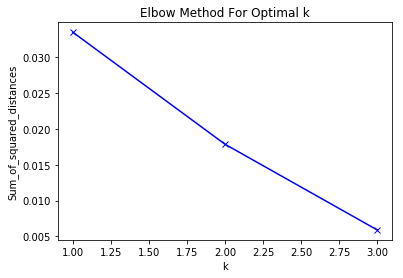

In [130]:
K2 = range(1,len(toronto_ven_grp_a))
plt.plot(K2,  elbow2, 'bx-')
plt.xlabel('k')  
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [131]:
boroughs_venues_sorted_a.insert(0,'Cluster Labels',km2.labels_)
boroughs_venues_sorted_a


,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Downtown Toronto,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Bakery,Bar,Japanese Restaurant,Park,Seafood Restaurant
1,2,Etobicoke,Pizza Place,Sandwich Place,Coffee Shop,Pharmacy,Grocery Store,Gym,Pool,Fast Food Restaurant,Café,Park
2,0,North York,Coffee Shop,Clothing Store,Fast Food Restaurant,Pizza Place,Japanese Restaurant,Park,Restaurant,Grocery Store,Sandwich Place,Café
3,1,Scarborough,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection


In [132]:
toronto_final_a = new_toronto_b
toronto_final_a = toronto_final_a.join(boroughs_venues_sorted_a.set_index('Borough'), on = 'Borough')
toronto_final_a

,index,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M1B,Scarborough,"Rouge, Malvern",43.8067,-79.1944,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.7845,-79.1605,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.7636,-79.1887,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
3,3,M1G,Scarborough,Woburn,43.771,-79.2169,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
4,4,M1H,Scarborough,Cedarbrae,43.7731,-79.2395,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
5,5,M1J,Scarborough,Scarborough Village,43.7447,-79.2395,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
6,6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.7279,-79.262,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
7,7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.7111,-79.2846,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
8,8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.7163,-79.2395,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection
9,9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.6927,-79.2648,1,Fast Food Restaurant,Chinese Restaurant,Breakfast Spot,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Thai Restaurant,Indian Restaurant,Intersection


In [133]:
cluster_map2 = folium.Map(location =  [toronto_lat, toronto_lng], width = '75%', height = '75%', zoom_start = 10 )
x=np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for lat,lon,poi,cluster in zip(toronto_final_a['Latitude'], toronto_final_a['Longitude'], toronto_final_a['Borough'], toronto_final_a['Cluster Labels']):
    label = folium.Popup(str(poi)+'Cluster '+str(cluster),parse_html = True)
    folium.CircleMarker([lat,lon], 
                        radius = 5, 
                        popup = label,
                        color = rainbow[cluster-1],
                        fill = True,
                        fill_color = rainbow[cluster-1],
                        fill_opacity = 0.8).add_to(cluster_map2)
                        
cluster_map2     

Again there were only two boroughs that were similar enough to be clustered together. Interestingly it is again boroughs which are located centrally, which suggests that the central locations have many similar type venues compare to those in the east and west.  

Additionally the clusters are much more well defined then that of the boroughs with below avg postal codes. But this could be due to a larger set of data which allows for better clustering. 